# OscGenProcess.py Output Graphical Analysis
The below code section graphs the output data from the python oscillator version. Both python and c++ version of oscillators are tested in this script for future performance comparisons. 

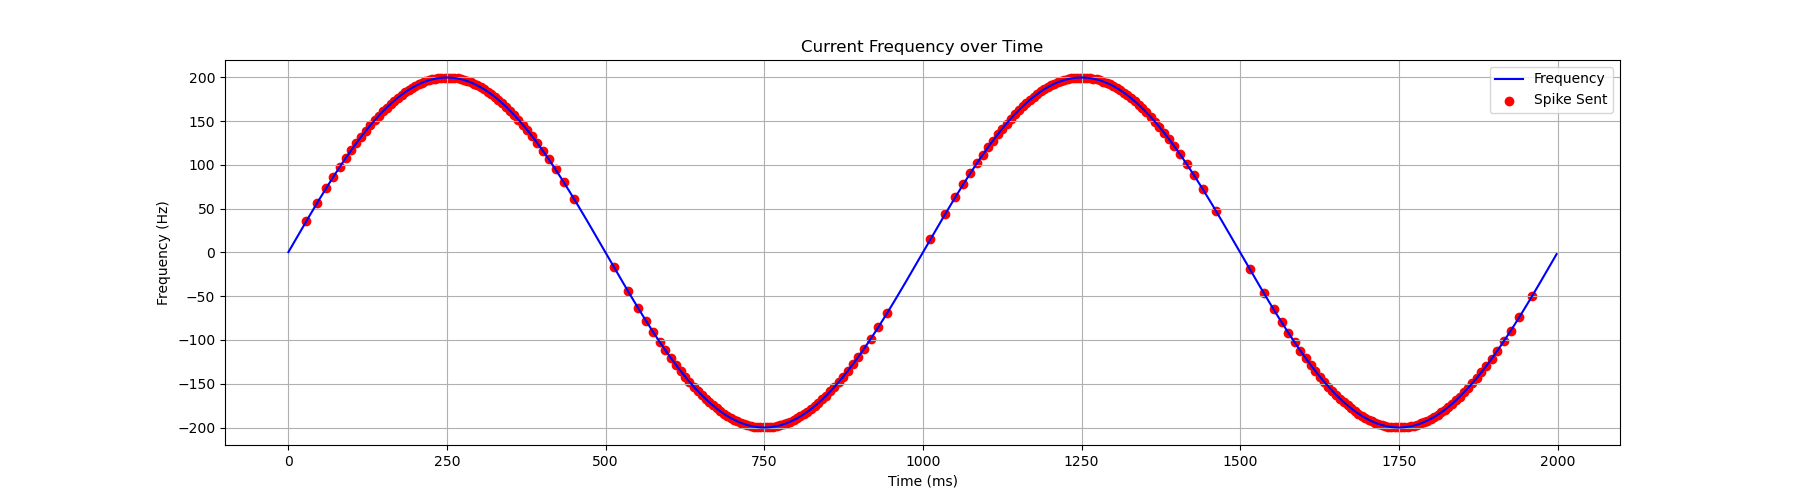

In [38]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('OscGenProcess.csv')

# Plot the data
plt.figure(figsize=(18, 5))
plt.plot(data['Time (ms)'], data['Frequency (Hz)'], label='Frequency', color='blue')
plt.scatter(data['Time (ms)'][data['Spike Sent'] == 1], data['Frequency (Hz)'][data['Spike Sent'] == 1], color='red', label='Spike Sent')

# Labeling the plot
plt.title('Current Frequency over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
import pandas as pd

file_path = 'OscGenProcess.csv'
data = pd.read_csv(file_path)

# Initialize columns
data['Time since last spike (ms)'] = 0.0
data['Spike Should Send'] = 0

# Calculate DT NOW (ms)
data['DT NOW (ms)'] = abs((1 / data['Frequency (Hz)']) * 1000)

# Initialize the last spike time
last_spike_time = 0.0

# Iterate over each row to calculate time since last spike and determine if a spike should be sent
for index, row in data.iterrows():
    # Calculate time since last spike
    time_since_last_spike = row['Time (ms)'] - last_spike_time
    data.at[index, 'Time since last spike (ms)'] = time_since_last_spike
    
    # Determine if a spike should be sent
    if time_since_last_spike > row['DT NOW (ms)']:
        data.at[index, 'Spike Should Send'] = 1
        last_spike_time = row['Time (ms)']

print(data.head())

# Identify rows where there is a discrepancy between Spike Sent and Spike Should Send
discrepancies = data[data['Spike Sent'] != data['Spike Should Send']]

num_discrepancies = discrepancies.shape[0]

# Print the rows with discrepancies
if not discrepancies.empty:
    print(f"Discrepancies found: {num_discrepancies} rows.")
    print(discrepancies)
else:
    print("No discrepancies found.")


   Time (ms)  Frequency (Hz)  Spike Sent  Time since last spike (ms)  \
0   0.390136        0.024513           0                    0.390136   
1   1.055740        0.066334           0                    1.055740   
2   1.292694        0.081221           0                    1.292694   
3   1.507394        0.094711           0                    1.507394   
4   1.739702        0.109307           0                    1.739702   

   Spike Should Send   DT NOW (ms)  
0                  0  40794.774806  
1                  0  15075.313077  
2                  0  12312.016073  
3                  0  10558.442090  
4                  0   9148.584788  
Discrepancies found: 1 rows.
      Time (ms)  Frequency (Hz)  Spike Sent  Time since last spike (ms)  \
44  1469.935782        0.680302           0                 1469.935782   

    Spike Should Send  DT NOW (ms)  
44                  1  1469.935782  


Time between spikes (ms):
0      17.649221
1      13.669843
2      11.627420
3      10.231674
4       9.261617
         ...    
244     9.054552
245     9.987496
246    11.228617
247    13.685504
248    20.329934
Name: Time Between Spikes (ms), Length: 249, dtype: float64


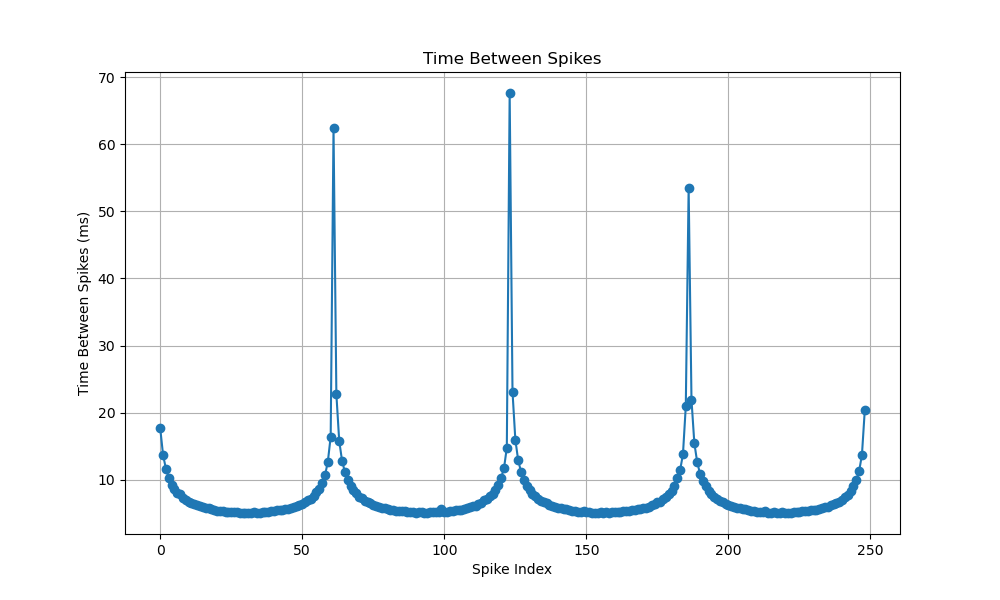

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'OscGenProcess.csv'
data = pd.read_csv(file_path)

spike_times = data[data['Spike Sent'] == 1]['Time (ms)'].reset_index(drop=True)
time_between_spikes = spike_times.diff().dropna().reset_index(drop=True)
time_between_spikes = time_between_spikes.rename('Time Between Spikes (ms)')

# Plot the time between spikes
plt.figure(figsize=(10, 6))
plt.plot(time_between_spikes, marker='o')
plt.title('Time Between Spikes')
plt.xlabel('Spike Index')
plt.ylabel('Time Between Spikes (ms)')
plt.grid(True)
plt.show()

# Graphical Output from the `SineWaveGenerator.cpp` program. 

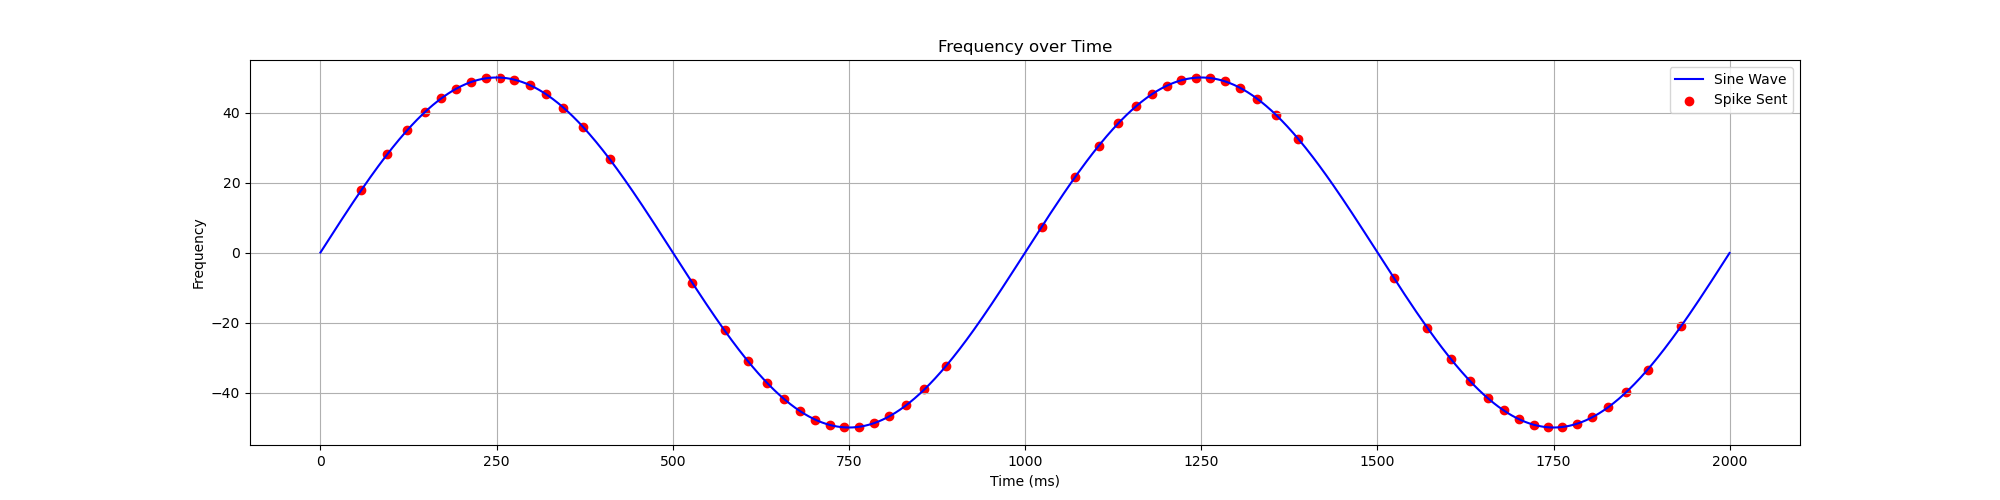

In [18]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Load the data from CSV
data = pd.read_csv('sine_wave_data.csv')

# Plotting the sine wave
plt.figure(figsize=(20, 5))
plt.plot(data['Time (ms)'], data['Frequency (Hz)'], label='Sine Wave', color='blue')
plt.scatter(data['Time (ms)'][data['Spike Sent'] == 1], data['Frequency (Hz)'][data['Spike Sent'] == 1], color = 'red', label = 'Spike Sent')


plt.title('Frequency over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
